In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
fsize = 12
font = {'size':fsize}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rc('figure', figsize=[4*4./3.,4.])
mpl.rc('figure', facecolor='w')

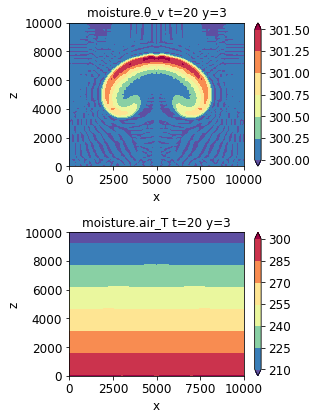

In [3]:
f = '/central/groups/esm/zhaoyi/clima/testcase/011121/dryrb/RisingBubble_DumpAux-2021-01-11T09.24.00.192.nc'
ds = xr.open_dataset(f)
x = ds.coords['x']
z = ds.coords['z']
time = ds.coords['time']
var_names = ['moisture.θ_v','moisture.air_T']
nvar = np.size(var_names)
tidx = 20
yidx = 3
nrow = 2
ncol = 1
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=[4.5*(ncol),3.*nrow])
cmap = plt.cm.Spectral_r

for vari in range(nvar):
    var_name = var_names[vari]
    da = ds.data_vars[var_name]
    da_isel = da.isel(time=tidx, y=yidx)
    title = var_name+' t='+str(tidx)+' y='+str(yidx)
    ax = axes.flat[vari]
    h = ax.contourf(x,z,da_isel,cmap=cmap,extend='both')
    cb = plt.colorbar(h, ax=ax)
    ax.set_title(title,fontsize=fsize)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
ds.close()
    
plt.tight_layout()